<a href="https://colab.research.google.com/github/truongnd2608/Genetic-Algorithm/blob/main/Tutorial_of_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'full-filled-brain-stroke-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2343381%2F3949526%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240418%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240418T123300Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D72eefa878ca901a6d067e69d8aa9ef4505b8728d8a81f3ac2803fac0c1508d3240a9e8a891307bdbec2ac7443fe4ed31317ae2ba52cbd7a3d46fef1c78d034234190913d3bfc795d4d656ab6a422d60783779fe2bf3b693d41ae650c953a77618c1befac9e1c357c908bc5eadd19d2a6722777fe71c10cbf712b2fc40161e0925f83b7eec6a4b92e96838f67e605482d47ba0ec9c566bdec899d256bb5211ba81988467f16b2c8d126e71d4960bb2fef43366d7cda6f2a7b86c6252bfd6658123644d4b849a59b9c46dbfb1c11f8e510d41a4a0169e65e1d3ee2ea7bfd28e8dccf8480a7a65d2e0ef820a874ea1b8344e3d967f2da79b19ed83e013f00c254aa'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 53377 bytes downloaded
Downloaded and uncompressed: full-filled-brain-stroke-dataset
Data source import complete.


# TUTORIAL of GENETIC ALGORITHM

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings

# Genetic Algorithm

* This theory has inspired evolutionary computation to solve optimization problems, feature selection, classic knapsack problem, and many more. The knapsack problem has been studied for more than a century, with early works dating as far back as 1897. The name "knapsack problem" dates back to the early works of the mathematician Tobias Dantzig (1884–1956),and refers to the commonplace problem of packing the most valuable or useful items without overloading the luggage.

* Let’s understand the application of the genetic algorithm with a knapsack problem. The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision-makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively.


* For example: Suppose we are on a treasure hunt, and after all the efforts and hard work, we finally find the treasure in a deep-down cave full of gold and diamond ornaments. The first thing we desire to do is fill our backpack with as many ornaments as possible. However, a few parameters have to be taken care of in our problem, and our backpack has limited space. It cannot carry a weight of more than 35 kilograms.

* Next, we have to choose the ornaments optimally such that the backpack is not overloaded, all the ornaments we choose must be highly valued, and one ornament should not damage the other within the backpack — this where a genetic algorithm comes into play to optimize our problem by taking care of all the parameters.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/500px-Knapsack.svg.png)

# Optimization
* In optimization, we start with some kind of initial values for the variables used in the experiment. Because these values may not be the best ones to use, we should change them until getting the best ones. In some cases, these values are generated by complex functions that we cannot solve manually easily. But it is very important to do optimization because a classifier may produce a bad classification accuracy not because, for example, the data is noisy or the used learning algorithm is weak but due to the bad selection of the learning parameters initial values. As a result, there are different optimization techniques suggested by operation research (OR) researchers to do such work of optimization. According to, optimization techniques are categorized into four main categories:

1.      Constrained Optimization

2.      Multimodal Optimization

3.      Multiobjective Optimization

4.      Combinatorial Optimization


* Looking at various natural species, we can note how they evolve and adapt to their environments. We can benefit from such already existing natural systems and their natural evolution to create our artificial systems doing the same job. This is called bionics. For example, the plane is based on how the birds fly, radar comes from bats, submarine invented based on fish, and so on. As a result, principles of some optimization algorithms comes from nature. For example, Genetic Algorithm (GA) has its core idea from Charles Darwin’s theory of natural evolution “survival of the fittest”. Before getting into the details of how GA works, we can get an overall idea about evolutionary algorithms (EAs).

![](https://teknoloji-tasarim.com/wp-content/uploads/2019/10/charles-darwin-22.jpg)


## Evolutionary Algorithms (EAs)

* Traditional calculus based methods work by starting at a random point and by moving in the direction of the gradient, till we reach the top of the hill. This technique is efficient and works very well for single-peaked objective functions like the cost function in linear regression. But, in most real-world situations, we have a very complex problem called as landscapes, which are made of many peaks and many valleys, which causes such methods to fail, as they suffer from an inherent tendency of getting stuck at the local optima as shown in the following figure.

![](https://media-exp1.licdn.com/dms/image/C4D12AQE-FoZsSdC1WA/article-inline_image-shrink_1000_1488/0/1590088631920?e=1659571200&v=beta&t=W7r1rQasC9pqPpjiwjYjnoaueYbSPlB7gMkm9PHOR_M)


* For example, Genetic Algorithm (GA) has its core idea from Charles Darwin’s theory of natural evolution “survival of the fittest”. Before getting into the details of how GA works, we can get an overall idea about evolutionary algorithms (EAs). The difference between traditional algorithms and EAs is that EAs are not static but dynamic as they can evolve over time.

### Evolutionary algorithms have three main characteristics:

1.      Population-Based: Evolutionary algorithms are to optimize a process in which current solutions are bad to generate new better solutions. The set of current solutions from which new solutions are to be generated is called the population.

2.      Fitness-Oriented: If there are some several solutions, how to say that one solution is better than another? There is a fitness value associated with each individual solution calculated from a fitness function. Such fitness value reflects how good the solution is.

3.      Variation-Driven: If there is no acceptable solution in the current population according to the fitness function calculated from each individual, we should make something to generate new better solutions. As a result, individual solutions will undergo a number of variations to generate new solutions.

### Genetic Algorithm (GA)
*  The genetic algorithm is a random-based classical evolutionary algorithm and which that combinatorial optimization algorithm.  Genetic Algorithms is also combinatorial optimization algorithm. By random here we mean that in order to find a solution using the GA, random changes applied to the current solutions to generate new ones. Note that GA may be called Simple GA (SGA) due to its simplicity compared to other EAs.

* GA is based on Darwin’s theory of evolution. It is a slow gradual process that works by making changes to the making slight and slow changes. Also, GA makes slight changes to its solutions slowly until getting the best solution.

![](https://www.pcimedia.org/wp-content/uploads/2020/05/Screen-Shot-2020-05-11-at-10.19.12-AM.png)

[Reference from contributor of PyGAD](https://www.linkedin.com/pulse/introduction-optimization-genetic-algorithm-ahmed-gad/)

## Here is the description of how the GA works:

### Steps in a Genetic Algorithm
* 1. Initialize population
* 2. Select parents by evaluating their fitness
* 3. Crossover parents to reproduce
* 4. Mutate the offsprings
* 5. Evaluate the offsprings
* 6. Merge offsprings with the main population and sort

* GA works on a population consisting of some solutions where the population size (popsize) is the number of solutions. Each solution is called individual. Each individual solution has a chromosome. The chromosome is represented as a set of parameters (features) that defines the individual. Each chromosome has a set of genes. Each gene is represented by somehow such as being represented as a string of 0 s and 1 s as in the next diagram.

[Refenrence from](https://pub.towardsai.net/genetic-algorithm-ga-introduction-with-example-code-e59f9bc58eaf)

### What is the terms of Gene - Chromosome - Population

![](https://miro.medium.com/max/1400/0*UHuCl0mv5gojuGId.jpeg)

* Each columns of population are knowing as gene location.

* Also, each individual has a fitness value. To select the best individuals, a fitness function is used. The result of the fitness function is the fitness value representing the quality of the solution. The higher the fitness value the higher the quality the solution. Selection of the best individuals based on their quality is applied to generate what is called a mating pool where the higher quality individual has higher probability of being selected in the mating pool.

* The individuals in the mating pool are called parents. Every two parents selected from the mating pool will generate two offspring (children). By just mating high-quality individuals, it is expected to get a better quality offspring than its parents. This will kill the bad individuals from generating more bad individuals. By keeping selecting and mating high-quality individuals, there will be higher chances to just keep good properties of the individuals and leave out bad ones. Finally, this will end up with the desired optimal or acceptable solution. (As known as elitism: A practical variant of the general process of constructing a new population is to allow the best organism(s) from the current generation to carry over to the next, unaltered. This strategy is known as elitist selection and guarantees that the solution quality obtained by the GA will not decrease from one generation to the next. But here in the real world, things don't work that way. )

* But the offspring currently generated using the selected parents just have the characteristics of its parents and no more without changes. There is no new added to it and thus the same drawbacks in its parents will actually exist in the new offspring. To overcome such problem, some changes will be applied to each offspring to create new individuals. The set of all newly generated individuals will be the new population that replaces the previously used old population. Each population created is called a generation. The process of replacing the old population by the new one is called replacement. The following diagram summarizes the steps of GA.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/f167tW2/Untitled-Diagram-drawio-1.png" alt="Untitled-Diagram-drawio-1" border="0"></a>

#### There are two questions to be answered to get the full idea about GA:

1.      How the two offspring are generated from the two parents?

2.      How each offspring gets slightly changed to be an individual?

We will answer these questions later.

### Chromosome Representation and Evaluation

* There are different representations available for the chromosome and the selection of the proper representation is problem specific. The good representation is what makes the search space smaller and thus easier search.

* The representations available for the chromosome including:
    * Binary: Each chromosome is represented as a string of zeros
    * Permutation: Useful for ordering problems such as travelling salesman
    * Value: The actual value is encoded
    
* For example, if we are to encode the number 7 in binary, it might look as follows:


![](https://media-exp2.licdn.com/dms/image/C5612AQHsFFrk4dc5ww/article-inline_image-shrink_1000_1488/0/1520023968592?e=1663804800&v=beta&t=0hNb__MOVeKlRHahdS21QAq9GAMYmzmLqQmHmvtx3Ts)

* Each part of the above chromosome is called gene. Each gene has two properties. The first one is its value (allele) and the second one is the location (locus) within the chromosome which is the number above its value.

#### Each chromosome has two representations.

#### 1.      genotype: The set of genes representing the chromosome.

#### 2.      phenotype: The actual physical representation of the chromosome.

* In the above example, binary of 0111 is the genotype and 7 is the phenotype representation.

* After representing each chromosome the right way to serve to search the space, next is to calculate the fitness value of each individual. Assume that the fitness function used in our example is:

    * f(x) = 2x+2 Where x is the chromosome value

* Then the fitness value of the previous chromosome is:

    * f(7) = 2(7)+2=16

* The process of calculating the fitness value of a chromosome is called evaluation.

* Suppose the x can taking arange (0,10) and global minimum value of the function is assumed to be 2.

    * f(xn) = 2
    * Binary of numbers:
    
        * 0 = 0000
        * 1 = 0001
        * 2 = 0010
        * 3 = 0011
        * 4 = 0100
        * 5 = 0101
        * 6 = 0110
        * 7 = 0111
        * 8 = 1000
        * 9 = 1001
        * 10 = 1010
        
     * Here we have one dimensional function and our population is limitly, we are making mutation randomly. After that, I will explain another two dimensional sphere function.
          
          * Transactions:
              * 0111 was used in generation 1 (random) --> f(7) = 16 cost is high
                  * Here have two probability:
                      * Randomly selecting in all probabilities:
                          * 1111 was used in generation  --> f(15) = out of range
                          * 0000 was used in generation  --> f(0) = 2
                          * Randomly selection havent any strategy and it is not guarented to desired result
                      * Elitist function make reducing x value:
                          * 0110 was used in generation  --> f(6) = 14 cost is high
                          * 0100 was used in generation  --> f(4) = 10 cost is high
                          * 0000 was used in generation  --> f(0) = 2 yes we find
                          * Maybe our process longer with another finding strategy.

#### In this section, we learned that the genetic process changes the genotype of the subject. Then changed genotype represented itself with another phenotype of the subject and this subject's fitness. The optimization strategy may be random or elitist but we will use an elitist strategy.


### Another example for fitting the desire result with letters.
*code from geeksforgeeks*
![](https://static.euronews.com/articles/stories/05/04/21/50/1000x563_cmsv2_afe3c13c-f5df-54bb-9736-60effd3f8d49-5042150.jpg)

In [ ]:
# code from: https://www.geeksforgeeks.org/genetic-algorithms/

import random

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "Kaggle!"

class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: lh)/Xq!	Fitness: 6
Generation: 2	String: KLu 9e6	Fitness: 5
Generation: 3	String: KLu 9e6	Fitness: 5
Generation: 4	String: K]g19e[	Fitness: 4
Generation: 5	String: K]g19e[	Fitness: 4
Generation: 6	String: K4g)9e!	Fitness: 3
Generation: 7	String: K4g)9e!	Fitness: 3
Generation: 8	String: K4g)9e!	Fitness: 3
Generation: 9	String: KaggSe[	Fitness: 2
Generation: 10	String: KaggSe[	Fitness: 2
Generation: 11	String: Kagg%e!	Fitness: 1
Generation: 12	String: Kagg%e!	Fitness: 1
Generation: 13	String: Kagg%e!	Fitness: 1
Generation: 14	String: Kagg%e!	Fitness: 1
Generation: 15	String: Kaggle!	Fitness: 0


* Our desired result is "Kaggle!"
* Our chromosome length is 7 letters.
* The population has one sample.
* The first generation was selected randomly ("HaXrH#!") but their chromosome length same with the sample. The nineteenth generation evolved the desired result.
* I think that these examples really explained the mutation process.

### Let's to optimizing to sphere function.
![](https://www.mdpi.com/data/data-07-00046/article_deploy/html/images/data-07-00046-g0A1.png)

In [ ]:
# cost function
def sphere(x):
    return sum(x**2)
# Placeholder for every individual
population = {}
# population size
npop = 20
# lower bound
varmin = -10
# upper bound
varmax = 10
# cost function
costfunc = sphere
# each inidivdual has position(chromosomes) and cost
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
    # Best solution found
    # create individual as many as population size(npop)
bestsol = copy.deepcopy(population)
bestsol_cost = np.inf
for i in range(npop):
    population[i] = {'position': None, 'cost': None}
for i in range(npop):
    population[i]['position'] = np.random.uniform(varmin, varmax,npop)
    population[i]['cost'] = costfunc(population[i]['position'])

* We create a dictionary to hold the population, and each individual is associated with chromosomes(position) and a cost. The position is filled with randomly generated uniformly distributed numbers(genes) with a lower limit -10 and an upper limit +10. Cost is the cost function we are trying to optimize. In this tutorial, we will be optimizing the sum of squares of x, where x is the individual gene of each chromosome.

# Parent Selection
* During each successive generation, a portion of the existing population is selected to breed a new generation. Individual solutions are selected through a fitness-based process. As we are in generation 0, we do not have offsprings. We select parents from our randomly generated population. There are three main methods to define the best fit individuals and select for breeding.

## Random selection:
* This is the simplest and most inefficient way of selecting parents. In this method, we shuffle the population by performing permutation and select the first two individuals as parents for breeding. This method is not recommended because it does not follow “Darwin’s Theory of Evolution by Natural Selection,” wherein individuals are selected based on their fitness, not randomly.

![](https://welcm.uk/storage/wink/images/fW3Goup1rN5BTyR0ZMBZmwsHHPdhcKivcsLSOWgH.jpeg)

In [ ]:
# For random selection
q = np.random.permutation(npop)
p1 = population[q[0]]
p2 = population[q[1]]

### Tournament selection:
This method is based on the probability of selection of each individual. We run several tournaments among a randomly selected group of individuals, select one individual from each group as the winner, and again run the tournament by grouping winners from the first iteration, repeat the process until we converge to two winners parents for breeding. The best member of each group in every iteration has the highest probability of selection.

![](https://www.researchgate.net/profile/Elisaveta-Shopova/publication/235719002/figure/fig3/AS:669390773161986@1536606605073/Principle-of-tournament-selection.ppm)

### Roulette wheel selection:
This is a widely used and most efficient method for selecting parents; hence we will be using it today in our algorithm. We all know how the roulette wheel works in casinos, drop the ball, spin the wheel, and wait till the wheel stops to see which pot the ball falls in. Let’s take a deeper dive into the implementation part.
![](https://miro.medium.com/max/1400/1*7sMoHK26bY2O-NzZBGqSmw.png)

The only difference between the casino roulette wheel and the roulette wheel method for parent selection is that in the casino roulette wheel, each pot has an equal probability of holding the ball when the wheel stops rotating. However, here we define the probability for each pot(individual of the population). The probability of each individual is called the fitness of the individual.
![](https://miro.medium.com/max/1400/0*1KZQfvbi5T2h_rKk.png)

* We have four parents P1, P2, P3, and P4, with the probability of being selected for breeding 0.1, 0.2, 0.3, 0.4, respectively. The arrow is fixed at a place, and the wheel is rotated. When the wheel stops rotating, the parent where the arrow points to is chosen for breeding—the greater the probability larger the area on the wheel, leading to a higher probability of being selected.

* Now, how do we implement the roulette wheel programmatically? We open the wheel into a uniform line and divide the line into the number of parents in the population, and each parent occupies the space on the line equal to its probability of being selected, and each cut point is the cumulative sum of probability. Generating a random number between 0 and 1 will act like the arrow that selects the parent for breeding. Here, the random number is 0.28; hence the winner is P2.

![](https://miro.medium.com/max/1400/0*RXV2IqV1sT9NapGq.jpeg)

* To make it even simpler, we calculate each parent’s probability’s cumulative sum, multiply its sum with a randomly generated number. Then get the index of the first parent whose cumulative value is greater than the random number. For example, P1 has a cumulative value of 0.1, P2 has 0.3, P3 has 0.6, and P4 has 1. If the random number generated is 0.28, then the first parent whose cumulative value is greater than 0.28 is P2 hence the winning parent for breeding. Function argwhere() returns an array of Trues and Falses based on the expression passed as a parameter.

In [ ]:
# Calculating probability for roulette wheel selection
beta = 1
# Create for list
costs = []

for i in range(len(population)):
   # list of all the population cost
   costs.append(population[i]['cost'])
costs = np.array(costs)
# take mean of all
avg_cost = np.mean(costs)
if avg_cost != 0:

    """We calculate each parent’s probability by the exponential of negative beta times costs,
    where beta is a pre-defined integer and costs is the cost of each parent divided
    by the average cost of all the parents in the population."""

    costs = costs/avg_cost
probs = np.exp(-beta*costs)

def roulette_wheel_selection(p):
    # cumulative sum creating linear roulette wheel
    c = np.cumsum(p)
    # sum(p) = calculate to 100%
    # create random number
    r = sum(p) * np.random.rand()
    # sometimes r becomes bigger than c, drop them
    # choose non_zero population
    ind = np.argwhere(r <= c)
    # get the index of the first parent whose cumulative value is greater than the random number.
    return ind[0][0]

# roulette_wheel_selection(probs) choose randomly indices from population.
# lets create parents:

p1 = population[roulette_wheel_selection(probs)]
print(p1)
p2 = population[roulette_wheel_selection(probs)]
print(p2)

{'position': array([-2.95677839,  1.55475936,  9.6339954 , -1.08843336, -5.05283028,
       -5.9481877 ,  5.31210423,  1.67946907, -5.31873631, -8.23272663,
       -6.22256654, -3.10732033,  3.33756183, -2.87510561, -0.9619715 ,
        3.09514504,  0.45766254,  7.73268096, -0.88429476, -6.83860352]), 'cost': 479.01513439934786}
{'position': array([-7.26505956, -0.78144924,  0.39244025,  7.34354875,  6.75943192,
       -1.35754198,  4.34271537,  9.4345336 , -4.30651574,  3.50304567,
        7.75613807,  3.41791401,  2.83635717,  5.5709242 ,  5.36962002,
        6.37243019, -0.48022293, -5.43940855, -2.1517091 ,  6.78622099]), 'cost': 554.5543636901423}


## Crossover
* Now that we got our two parents for breeding, the next step is to perform crossover/mating/breeding. Crossover refers to the process where certain genes from both the parent chromosomes are overlapped or mixed or swapped to produce new offspring. Since the offspring is the result of the parent chromosomes’ crossover, it inherits both the parents' characteristics. There are three methods to perform crossover.

![](https://images.squarespace-cdn.com/content/v1/5c5aed8434c4e20e953d6011/1602410149373-1VJFUM1VLQYQF1O2HZ75/crossing+over.jpg?format=1000w)

### Single-point crossover:
* In this method, both the parent chromosomes are cut at the same random point, and the leftover parts are swapped to produce two new offspring chromosomes. Yellow-colored genes represent the cutoff part of the chromosome.
![](https://miro.medium.com/max/1400/0*4yZ7VBKdQV-kcwBv.jpeg)
### Two-point crossover:
* A method similar to the single-point crossover, but the only difference is that the parent chromosomes are cut at two random points. Again, the yellow-colored cut off part of the chromosome is swapped.
![](https://miro.medium.com/max/1400/0*pQL21129SObz2vAR.jpeg)
### Uniform crossover:
* We first randomly choose which genes are supposed to be inherited from both the parent chromosomes and genes not inherited are marked in yellow color. Then, we model them as 0s and 1s, which are written in green color. The gene to be inherited is encoded as 1, and the gene that should not be inherited is encoded as 0. This series of 0s and 1s will be referred to as alpha from now on. Multiply the gene value with the corresponding alpha value for both the parents and then add the results to generate a single gene of the offspring chromosome. Let’s consider the first gene of each parent chromosome. For parent-1, the gene value is 1, and the corresponding alpha value is also 1; hence, 1x1=1. For parent-2, gene value is 0 and the corresponding alpha value is also 0 hence, 0x0=0. The first gene of the offspring chromosome is 1+0=1, and so on — this way, we get offspring-1, to reproduce the offspring-2, we take the compliment values of alpha and carry out the same process.
![](https://miro.medium.com/max/1400/0*dUczZqdp4q7N_UqU.jpeg)

* Programatically, we copy both the parents into the child variable: c1, c2. Randomly generate uniformly distributed alpha values between 0 and 1, which is the parent chromosome’s shape (position). The rest of the process remains the same, except, in theory, we take the complement of alpha values to produce offspring-2, whereas, in the program, we swap the parents while multiplying with alpha, which is the same as taking the complement of alpha values.

In [ ]:
import copy
def crossover(p1, p2):
    # take a copy of parents
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2

### Mutation
* DNA has two chain codes.
* Starting from one:
* Nucleic acids are the smallest building blocks for DNA;
    * Codon structure makes from three nucleic acids
        * Every codon presents one amino acid code
        * Human cells can encode 20 aminoacid with 64 codon
        * Every DNA process must start with the start codon "AUG". "AUG" also codes for methionine. On the other hand, codons "UAA", "UAG" and "UGA" are called stop codons and do not code for amino acids.
        * Summary, human have 61 codone for encoding to protein. Bu computer science have two.
            * Amino acids are the smallest building blocks for protein
                * Each protein is represented in DNA by a gene.
                    * Scientists estimate that the human genome, for example, has about 20,000 to 25,000 protein-coding genes.
                        * You can think of a chromosome is condensed DNA. Human have 46 chromosomes.
                        
* Mutation:

     * Natural selection can adjust the rate of mutation in a population by acting on allelic variation affecting processes of DNA replication and repair. Because mutation is the ultimate source of the genetic variation required for adaptation, it can be appealing to suppose that the genomic mutation rate is adjusted to a level that best promotes adaptation. Most mutations with phenotypic effects are harmful, however, and thus there is relentless selection within populations for lower genomic mutation rates. Selection on beneficial mutations can counter this effect by favoring alleles that raise the mutation rate, but the effect of beneficial mutations on the genomic mutation rate is extremely sensitive to recombination and is unlikely to be important in sexual populations. In contrast, high genomic mutation rates can evolve in asexual populations under the influence of beneficial mutations, but this phenomenon is probably of limited adaptive significance and represents, at best, a temporary reprieve from the continual selection pressure to reduce mutation. The physiological cost of reducing mutation below the low level observed in most populations may be the most important factor in setting the genomic mutation rate in sexual and asexual systems, regardless of the benefits of mutation in producing new adaptive variation. Maintenance of mutation rates higher than the minimum set by this "cost of fidelity" is likely only under special circumstances. [references for article](https://onlinelibrary.wiley.com/doi/epdf/10.1002/1521-1878%28200012%2922%3A12%3C1057%3A%3AAID-BIES3%3E3.0.CO%3B2-W)
     * Mutation is vital things for life.
     
     
     
<a href="https://ibb.co/xm2LLS8"><img src="https://i.ibb.co/7gSCCJN/Ekran-Resmi-2022-07-18-01-14-32.png" alt="Ekran-Resmi-2022-07-18-01-14-32" border="0"></a>

#### please check-up for more knowledge:
[NIH Genetics Glossary](https://www.genome.gov/genetics-glossary)

* More DNA replication means separating chains, especially during reproduction.
* Actually, chromosome structure is also an evolutionary structure, because chromosomes are saving genetic materials.
* Let's think from the perspective of real cells. Considering that our genetic structure is inherited from our previous ancestors, we accept that our genetic structure as a cell is in the best condition and we would like to pass it on to the next generation as it is or better. For this reason, we must have developed a method to prevent it every time there is a risk of mutation. Otherwise, our ancestors would have already been eliminated, but we are also aware that we can be better. In short, we want mutations, but under more moderate and controlled mechanisms.
* I mentioned that we have 64 codone but they represent to 20 nucleic acids. It is another prevention strategy for genetic materials.
* Anyway, I'm wrapping up and returning to our main topic. Other questions about genetics please ask in the comment section. :D

![](https://www.criver.com/sites/default/files/Eureka%20images/Charts%20for%20blogs/COVID-19-VARIANT1-IMAGE.gif)
![](https://images.ctfassets.net/4yflszkpcwkt/cM5qlVvFO3nR1PYr80UwR/e90389fa0b38cd0620c9722f60b0fffb/Types-of-Mutations.jpg)

### Maybe we can creating other crossover method like as real life.

# Mutation (now Genetic Algorithm)
* Mutation is a natural process that occurs due to an error in replication or copying of genes. While performing crossover, we replicated the parent chromosomes by mix-matching genes of both the parents. There is no guarantee that the copying of the parent gene is 100% accurate. There always occurs an error, which leads to the scope of exploration. For example, if both of your parents have brown eyes and blue eyes, that is probably because of a mutation that occurred due to an error while copying your parents’ genes, and your subsequent generation might carry forward that characteristic.

* Mutating the chromosome in the genetic algorithm is necessary because it may result in revolutionary results that will help solve our problem more efficiently. So, we have three parameters: the child chromosome(c), the mutation rate(mu), and the step size(sigma). The mutation rate(mu) determines the percentage of the child chromosome that undergoes mutation.

* To define which genes will be mutated, we generate random numbers and compare them to the mutation rate then we find the indices of the child chromosome(position) that have values less than the mutation rate using the argwhere() function. Replace those indices with new(mutated) genes generated by multiplying the step size(sigma) with randomly generated value and adding it to the original gene.

In [ ]:
def mutate(c, mu, sigma):
   # mu - mutation rate. % of gene to be modified
   # sigma - step size of mutation
   # mutation = original gene + (step size * random number)
    y = copy.deepcopy(c)
   # array of True and Flase, indicating the mutation position
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y

# Evaluating the Offsprings
Once the offsprings undergo mutation, we need to evaluate them with the cost function to define their fitness. Also, replace the best solution in every generation/iteration.

In [ ]:
# Evaluate first off spring
# calculate cost function of child 1
# Best solution found
bestsol = copy.deepcopy(population)
# initial best cost is infinity
bestsol_cost = np.inf
c1,c2 = crossover(p1, p2)
c1['cost'] = costfunc(c1['position'])
if type(bestsol_cost) == float:
  # replacing best solution in every generation/iteration
  if c1['cost'] < bestsol_cost:
    bestsol_cost = copy.deepcopy(c1)
else:
   # replacing best solution in every generation/iteration
   if c1['cost'] < bestsol_cost['cost']:
        bestsol_cost = copy.deepcopy(c1)
# Evaluate second off spring
if c2['cost'] < bestsol_cost['cost']:
    bestsol_cost = copy.deepcopy(c2)

print("c1 cost",c1['cost'])
print("c2 cost",c2['cost'])

c1 cost 329.36560087143573
c2 cost 554.5543636901423


In [ ]:
# This function holding in borders

def bounds(c, varmin, varmax):
    #Defines the upper and lower bound of gene value
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']

c1['position'] = bounds(c1, varmin, varmax)
c2['position'] = bounds(c2, varmin, varmax)

c1['cost'] = costfunc(c1['position'])
c2['cost'] = costfunc(c2['position'])
print("c1 cost",c1['cost'])
print("c2 cost",c2['cost'])

c1 cost 329.36560087143573
c2 cost 160.05493434493525


In [ ]:
# This loop choose the best one and updating with this.
if type(bestsol_cost) == float:
    # replacing best solution in every generation/iteration,
    if c1['cost'] < bestsol_cost:
        bestsol_cost = copy.deepcopy(c1)
    else:
        if c1['cost'] < bestsol_cost['cost']:
            bestsol_cost = copy.deepcopy(c1)

        elif c2['cost'] < bestsol_cost['cost']:
            bestsol_cost = copy.deepcopy(c2)

bestsol_cost

{'position': array([-7.04210810e+00,  4.84531768e-01,  6.91565987e+00,  4.47673354e+00,
         7.39812752e-01, -4.19567229e+00,  4.74929883e+00,  6.30056886e+00,
        -4.72661045e+00, -6.21913080e+00, -1.43099881e+00, -2.46639077e+00,
         3.09121456e+00,  9.64774353e-03,  3.91449031e+00,  5.43420273e+00,
        -5.21136635e-03,  2.21320187e+00, -1.43467393e+00, -8.67585177e-01]),
 'cost': 329.36560087143573}

# Merge Offsprings with the Main Population and Sort
Merging the offsprings is vital for them to be considered as parents to reproduce the next generation. Upon sorting the new population, we have better individuals at the top. Since the population size remains the same as the first iteration(npop), the number of individuals at the bottom of the sorted population equal to the number of new offsprings produced in the previous iteration are eliminated from the selection process to breed new offsprings, and the process continues — this is how the process of elimination takes place.

![](https://miro.medium.com/max/1400/0*MSgSz6CzQxbwYM9M.jpeg)

In [ ]:
# All function for GA

# cost function
def sphere(x):
    return sum(x**2)
def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]
def crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    # Uniform crossover
    alpha = np.random.uniform(0, 1, *(c1['position'].shape))
    c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2
def mutate(c, mu, sigma):
    #c: child chromosome
    #mu: mutation rate. % of gene to be modified
    #sigma: step size of mutation'''
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu  # array of True and Flase, indicating at which position to perform mutation
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y
def bounds(c, varmin, varmax):
    #Defines the upper and lower bound of gene value'''
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']
def sort(arr):
    # Bubble sorting the population + offsoring
    # in every iteration to get best fit individuals at top'''
    n = len(arr)

    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [ ]:
# let's creating all function in one function

def ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta, verbose):

  # Placeholder for each individual
    population = {}
    # each inidivdual has position(chromosomes) and cost,
    for i in range(npop):
        population[i] = {'position': None, 'cost': None}
        # create individual as many as population size(npop)

    # Best solution found
    bestsol = copy.deepcopy(population)
    # initial best cost is infinity
    bestsol_cost = np.inf

  # Initialize population - 1st Gen
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        # randomly initialize the chromosomes and cost
        population[i]['cost'] = costfunc(population[i]['position'])
        # if cost of an individual is less(best) than best cost,

        if population[i]['cost'] < bestsol_cost:
        # replace the best solution with that individual
            bestsol = copy.deepcopy(population[i])

    # Best cost of each generation/iteration
    bestcost = np.empty(maxit)

    print("Results return per {} iter".format(verbose))
    # Main loop
    for it in range(maxit):
    # Calculating probability for roulette wheel selection
        costs = []
        for i in range(len(population)):
            costs.append(population[i]['cost'])
            # list of all the population cost
        costs = np.array(costs)
        avg_cost = np.mean(costs)
        # taking average of the costs
        if avg_cost != 0:
            costs = costs/avg_cost
        # probability is exponensial of -ve beta times costs
        probs = np.exp(-beta*costs)

        for _ in range(num_children//2):

            # we will be having two off springs for each crossover
            # hence divide number of children by 2

            # Roulette wheel selection
            p1 = population[roulette_wheel_selection(probs)]
            p2 = population[roulette_wheel_selection(probs)]

            # crossover two parents
            c1, c2 = crossover(p1, p2)

            # Perform mutation
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)

            # Apply bounds
            c1['position'] = bounds(c1, varmin, varmax)
            c2['position'] = bounds(c2, varmin, varmax)

            # Evaluate first off spring
            # calculate cost function of child 1
            c1['cost'] = costfunc(c1['position'])

            if type(bestsol_cost) == float:
                # replacing best solution in every generation/iteration
                if c1['cost'] < bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                # replacing best solution in every generation/iteration
                if c1['cost'] < bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)


            # Evaluate second off spring
            # replacing best solution in every generation/iteration

            if c2['cost'] < bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
        # Merge, Sort and Select
        population[len(population)] = c1
        population[len(population)] = c2
        # Sort
        population = sort(population)
        # Store best cost
        bestcost[it] = bestsol_cost['cost']

        # Show generation information

        if it % verbose == 0:
            print('Iteration {}: Best Cost = {}'. format(it, bestcost[it]))



    out = population
    Bestsol = bestsol
    bestcost = bestcost
    return (out, Bestsol, bestcost)

Results return per 100 iter
Iteration 0: Best Cost = 33.19496291700214
Iteration 100: Best Cost = 0.7240611532364246
Iteration 200: Best Cost = 0.5298271963904557
Iteration 300: Best Cost = 0.4626614662060824
Iteration 400: Best Cost = 0.19468374464766314


<function matplotlib.pyplot.show(close=None, block=None)>

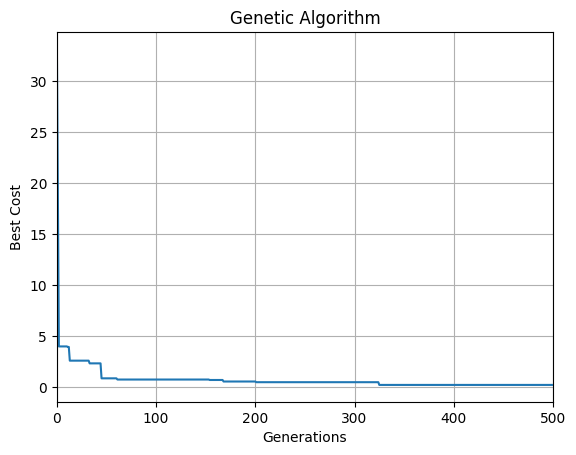

In [ ]:
# Problem definition
costfunc = sphere
# number of decicion variables
num_var = 5
# lower bound
varmin = -10
# upper bound
varmax = 10

# GA Parameters
# number of iterations
maxit = 500
# initial population size
npop = 20
beta = 1 # index for somewhere
# proportion of children to population
prop_children = 4
# making sure it always an even number
num_children = int(np.round(prop_children * npop/2)*2)
# mutation rate 40%
mu = 0.2
# step size of mutation
sigma = 0.2
# verbose for print frequency
verbose = 100

# Run GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta, verbose)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show

# Acknowledge
* First of all, Ahmed Fawzy Gad has developed a very nice library, make sure to examine it in depth. I will also share sample solutions soon. I also benefited a lot from Ahmed's medium articles, so I respect him for this reason.

[His linkedin profile](https://www.linkedin.com/in/ahmedfgad/)


[His medium profile](https://medium.com/@ahmedfgad)



* Secondly, I have benefited greatly from the article written by Sujan Shirol and Roberto Iriondo on the "towards-ai" site and even wrote the same. Because it has a really good explanation. However, the codes given in the article do not work properly and are confusing, but they have also developed a solution for it. There is a properly working version of all the code in Colab. However, I think that the return part of the "bounds" function in this code may be missing, I added this and I think the code works with higher performance. I also added a simple "verbose" function for return results.

[His linkedin profile](https://www.linkedin.com/in/robiriondo/)



[Article](https://pub.towardsai.net/genetic-algorithm-ga-introduction-with-example-code-e59f9bc58eaf)



[Colab](https://colab.research.google.com/drive/161ijkvn8wG_seVtQexm-p3fW3r5p8s_x?usp=sharing#scrollTo=of6BvUJWjRTh)


## The biggest of the praise is to, who provided all my inspiration and motivation on the subject, Prof. Dr. Asim Egemen Yılmaz.


[His linkedin profile](https://www.linkedin.com/in/asim-egemen-yilmaz-401bb23/)

![](https://sd.keepcalms.com/i-w600/please-follow-me-and-like-this.jpg)